In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.formula.api import ols

import evaluate
import math

### Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

#### 1.) Load the tips dataset from either pydataset or seaborn.

In [2]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


#### 2.) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.


In [3]:
x = pd.DataFrame(df.total_bill)
y = df.tip

new_tips = pd.concat([x,y], axis =1)

In [4]:
# Fit the model
lm = LinearRegression(normalize=True).fit(x, y)

# Set prediction
yhat = lm.predict(x)

# Create new predictions column
new_tips['yhat'] = yhat

#Take a look
new_tips.head()

,total_bill,tip,yhat
1,16.99,1.01,2.704636
2,10.34,1.66,2.006223
3,21.01,3.50,3.126835
4,23.68,3.31,3.407250
5,24.59,3.61,3.502822


In [5]:
# Create a baseline column
new_tips['baseline'] = new_tips.tip.mean()
new_tips.head()

,total_bill,tip,yhat,baseline
1,16.99,1.01,2.704636,2.998279
2,10.34,1.66,2.006223,2.998279
3,21.01,3.50,3.126835,2.998279
4,23.68,3.31,3.407250,2.998279
5,24.59,3.61,3.502822,2.998279


#### 3.) Plot the residuals for the linear regression model that you made.

In [6]:
# Calculate the residuals, yhat, and res baseline. Add them as a new 
# column
new_tips['residual'] = new_tips.tip - new_tips.yhat

new_tips['yhat_baseline'] = new_tips['tip'].mean()

new_tips['residual_baseline'] = new_tips['yhat_baseline'] - new_tips['tip']

new_tips['residual_baseline^2'] = new_tips.residual_baseline ** 2

new_tips.head()

,total_bill,tip,yhat,baseline,residual,yhat_baseline,residual_baseline,residual_baseline^2
1,16.99,1.01,2.704636,2.998279,-1.694636,2.998279,1.988279,3.953252
2,10.34,1.66,2.006223,2.998279,-0.346223,2.998279,1.338279,1.790990
3,21.01,3.50,3.126835,2.998279,0.373165,2.998279,-0.501721,0.251724
4,23.68,3.31,3.407250,2.998279,-0.097250,2.998279,-0.311721,0.097170
5,24.59,3.61,3.502822,2.998279,0.107178,2.998279,-0.611721,0.374203


Text(0.5, 1.0, 'Ordinary Least Means Residuals')

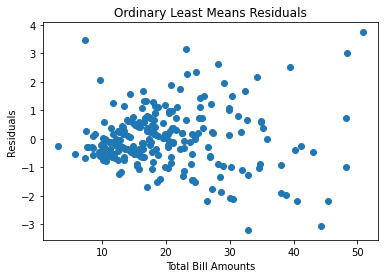

In [7]:
plt.scatter(new_tips.total_bill, new_tips.residual)

plt.xlabel('Total Bill Amounts')
plt.ylabel('Residuals')
plt.title('Ordinary Least Means Residuals')

#### 4.) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

#### Sum of Squared Errors

In [8]:
SSE = mean_squared_error(new_tips.tip, new_tips.yhat)*len(new_tips)

print('The SSE for the OLS model is', '{:.2f}'.format(SSE))

The SSE for the OLS model is 252.79


#### Explained Sum of Squares

In [9]:
ESS = sum((new_tips.yhat - new_tips.baseline)**2)

print('The ESS for the OLS model is', '{:.2f}'.format(ESS))

The ESS for the OLS model is 212.42


#### Total Sum of Squares

In [10]:
TSS = ESS + SSE

print('The TSS for the OLS model is', '{:.2f}'.format(TSS))

The TSS for the OLS model is 465.21


#### Mean Squared Error

In [11]:
MSE = SSE/len(new_tips)

print('The MSE for the OLS model is', '{:.2f}'.format(MSE))

The MSE for the OLS model is 1.04


#### Root Mean Squared Error

In [12]:
RMSE = sqrt(MSE)

print('The RMSE for the OLS model is', '{:.2f}'.format(RMSE))

The RMSE for the OLS model is 1.02


#### 5.) Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

#### SSE for Baseline

In [13]:
SSE_baseline = sum(new_tips['residual_baseline^2'])

print('The SSE of the baseline is', '{:.2f}'.format(SSE_baseline))

The SSE of the baseline is 465.21


#### MSE for Baseline

In [14]:
MSE_baseline = SSE_baseline/len(new_tips)

print('The MSE for the baseline is', '{:.2f}'.format(MSE_baseline))

The MSE for the baseline is 1.91


#### RMSE for Baseline

In [15]:
RMSE_baseline = sqrt(MSE_baseline)

print('The RMSE for the baseline is', '{:.2f}'.format(RMSE_baseline))

The RMSE for the baseline is 1.38


#### 6.) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [16]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])
df_difference = pd.DataFrame(np.array(['SSE - SSE_baseline','MSE - MSE_baseline','RMSE - RMSE_baseline']), columns=['metric'])


df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_eval['baseline_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])
df_eval['beats_baseline'] = df_eval.baseline_error > df_eval.model_error

df_eval

,metric,model_error,baseline_error,beats_baseline
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


#### 7.) What is the amount of variance explained in your model?

In [17]:
print('The amount of variance explained is', '{:.2f}'
      .format(r2_score(new_tips.tip, new_tips.yhat)))

The amount of variance explained is 0.46


#### 8.) Is your model better than the baseline model?

Yep!!!

#### 9.) Create an 'evaluate.py' with the following functions:

 - plot_residuals(y, yhat): creates a residual plot
 - regression_errors(y, yhat): returns the following values:
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)
 - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
 - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [18]:
### Function that creates a residuals plot
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()


### Functions that calculate the following regression errors
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

### Function that returns all regression errors
def regression_errors(actual, predicted):
    return pd.Series({
        'SSE': sse(actual, predicted),
        'ESS': ess(actual, predicted),
        'TSS': tss(actual),
        'MSE': mse(actual, predicted),
        'RMSE': rmse(actual, predicted),
    })

### Function that computes the SSE, MSE, and RMSE for the baseline model
def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'SSE': sse(actual, predicted),
        'MSE': mse(actual, predicted),
        'RMSE': rmse(actual, predicted),
    }

### Function that returns true if your model performs better than the baseline, otherwise false
def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline

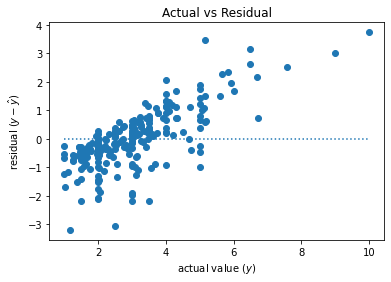

In [19]:
# Test
plot_residuals(df.tip,yhat)

In [20]:
regression_errors(df.tip,yhat)

SSE     252.788744
ESS     212.423733
TSS     465.212477
MSE       1.036019
RMSE      1.017850
dtype: float64

In [21]:
baseline_mean_errors(df.tip)

{'SSE': 465.2124770491804,
 'MSE': 1.906608512496641,
 'RMSE': 1.3807999538298954}

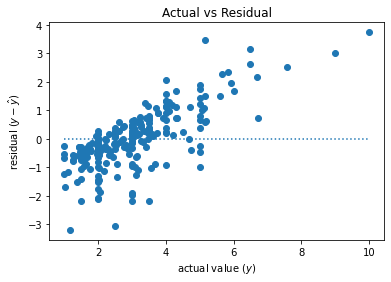

In [22]:
# Test: 
evaluate.plot_residuals(df.tip,yhat)

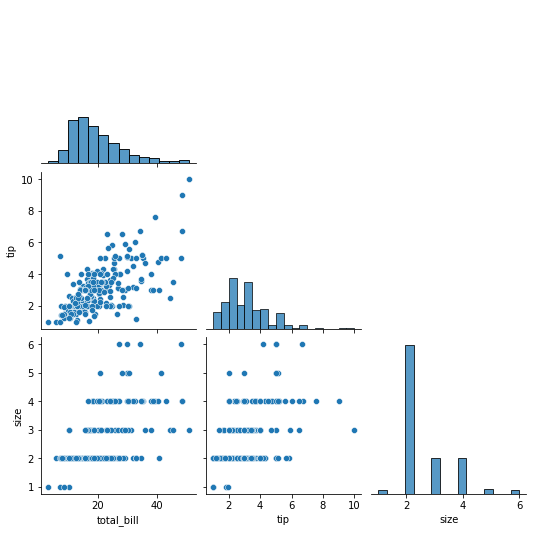

In [23]:
sns.pairplot(df, corner = True)

#### 10.) Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [24]:
# Acquire data
mpg = data('mpg')

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Text(0, 0.5, 'Highway MPG')

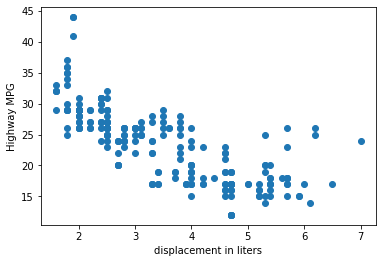

In [25]:
# Plot displacement and hwy mpg
plt.scatter(mpg.displ, mpg.hwy)
plt.xlabel('displacement in liters')
plt.ylabel('Highway MPG')

In [26]:
# Create the model and fit it
lm = LinearRegression(normalize=True).fit(mpg[['displ']], mpg.hwy)


In [27]:
# Make predictions
predicted = lm.predict(mpg[['displ']])

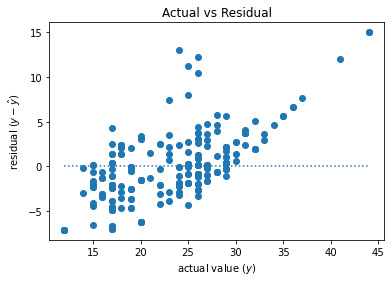

In [32]:
evaluate.plot_residuals(mpg.hwy, predicted)

In [28]:
evaluate.regression_errors(mpg.hwy, predicted)

SSE     3413.829009
ESS     4847.833384
TSS     8261.662393
MSE       14.589013
RMSE       3.819557
dtype: float64

In [36]:
evaluate.baseline_mean_errors(mpg.hwy)

{'SSE': 8261.66239316239, 'MSE': 35.30624954342902, 'RMSE': 5.941906221359356}

In [33]:
evaluate.better_than_baseline(mpg.hwy, predicted)

True